Neha Nilesh Gode

UID: 2021300039

Batch: B

Dataset link: https://www.kaggle.com/code/rtatman/how-to-find-stories-in-data-through-visualization/input?select=report.csv


In [10]:
install.packages(c("ggplot2", "dplyr", "tidyr", "lubridate"))
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
data <- read.csv(text = "
report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
1975,NM00101,\"Albuquerque, NM\",286238,2383,30,181,1353,819,12,832.52,10.48,63.23,472.68,286.13
1975,TX22001,\"Arlington, TX\",112478,278,5,28,132,113,12,247.16,4.45,24.89,117.36,100.46
1975,GAAPD00,\"Atlanta, GA\",490584,8033,185,443,3518,3887,12,1637.44,37.71,90.3,717.1,792.32
1975,CO00101,\"Aurora, CO\",116656,611,7,44,389,171,12,523.76,6,37.72,333.46,146.58
1975,TX22701,\"Austin, TX\",300400,1215,33,190,463,529,12,404.46,10.99,63.25,154.13,176.1
1975,MD00301,\"Baltimore County, MD\",642154,1259,25,137,347,750,12,196.06,3.89,21.33,54.04,116.79
1975,MDBPD00,\"Baltimore, MD\",864100,16086,259,463,6309,9055,12,1861.59,29.97,53.58,730.12,1047.91
1975,MA01301,\"Boston, MA\",616120,11386,119,453,3036,7778,12,1848.02,19.31,73.52,492.76,1262.42
1975,NY01401,\"Buffalo, NY\",422276,3350,63,192,755,2340,12,793.32,14.92,45.47,178.79,554.14
1975,NC06001,\"Charlotte, NC\",262103,1937,68,71,976,822,12,739.02,25.94,27.09,372.37,313.62
1975,ILCPD00,\"Chicago, IL\",3150000,37160,818,1657,12514,22171,12,1179.68,25.97,52.6,397.27,703.84
1975,OHCIP00,\"Cincinnati, OH\",433367,3578,64,261,1508,1745,12,825.63,14.77,60.23,347.97,402.66
1975,OHCLP00,\"Cleveland, OH\",659931,10403,288,491,2524,7100,12,1576.38,43.64,74.4,382.46,1075.87
1975,OHCOP00,\"Columbus, OH\",572797,3980,62,416,1100,2402,12,694.84,10.82,72.63,192.04,419.35
1975,TXDPD00,\"Dallas, TX\",864665,7655,237,547,3485,3386,12,885.31,27.41,63.26,403.05,391.6
1975,CODPD00,\"Denver, CO\",508140,4960,74,480,1838,2568,12,976.11,14.56,94.46,361.71,505.37
1975,MI82349,\"Detroit, MI\",1432444,30387,633,1424,7013,21317,12,2121.34,44.19,99.41,489.58,1488.16
1975,TX07102,\"El Paso, TX\",369000,1618,21,122,635,840,12,438.48,5.69,33.06,172.09,227.64
1975,VA02901,\"Fairfax County, VA\",487905,805,21,104,247,433,12,164.99,4.3,21.32,50.62,88.75
1975,TX22012,\"Fort Worth, TX\",381275,1939,69,169,494,1207,12,508.56,18.1,44.32,129.57,316.57
1975,CA01005,\"Fresno, CA\",176500,1141,25,84,465,567,12,646.46,14.16,47.59,263.46,321.25
1975,HI00200,\"Honolulu, HI\",705262,1596,58,169,319,1050,12,226.3,8.22,23.96,45.23,148.88
1975,TXHPD00,\"Houston, TX\",1372342,8924,347,588,1567,6422,12,650.28,25.29,42.85,114.18,467.96
1975,INIPD00,\"Indianapolis, IN\",503411,4655,95,351,1117,3092,12,924.69,18.87,69.72,221.89,614.21
")


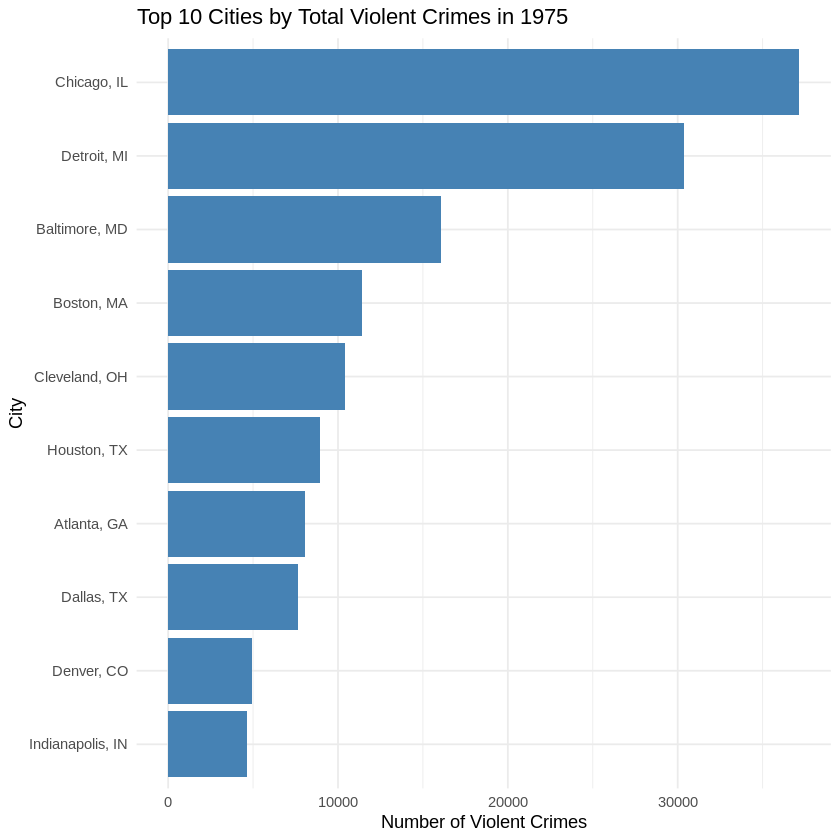

In [12]:
# 1. Bar chart: Top 10 cities by total violent crimes
bar_data <- data %>%
  arrange(desc(violent_crimes)) %>%
  head(10)

ggplot(bar_data, aes(x = reorder(agency_jurisdiction, violent_crimes), y = violent_crimes)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 10 Cities by Total Violent Crimes in 1975",
       x = "City",
       y = "Number of Violent Crimes") +
  theme_minimal()

Observation:

Chicago has the highest number of violent crimes, followed by Detroit and Baltimore.
There's a significant drop in violent crime numbers after the top 3 cities.
The top 10 list includes major metropolitan areas from various parts of the United States.

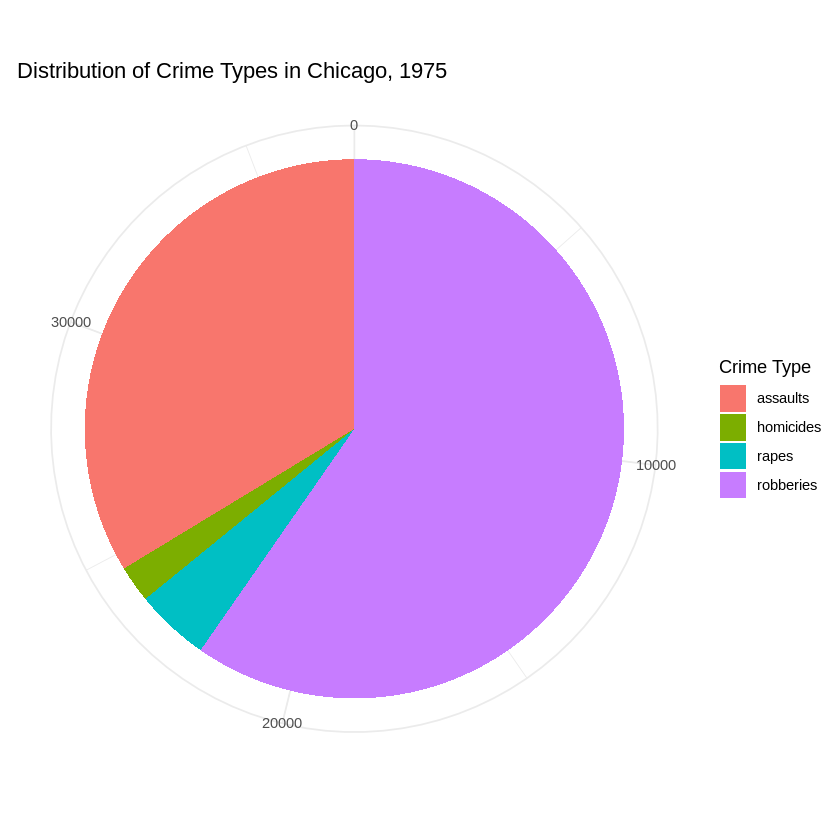

In [13]:
# 2. Pie chart: Distribution of crime types for the city with the highest total violent crimes
pie_data <- data %>%
  arrange(desc(violent_crimes)) %>%
  head(1) %>%
  select(homicides, rapes, assaults, robberies) %>%
  gather(key = "crime_type", value = "count")

ggplot(pie_data, aes(x = "", y = count, fill = crime_type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Distribution of Crime Types in Chicago, 1975",
       fill = "Crime Type") +
  theme_minimal() +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank())

Observation:

Robberies make up the largest portion of violent crimes in Chicago.
Assaults are the second most common type of violent crime.
Homicides and rapes have relatively smaller proportions compared to robberies and assaults

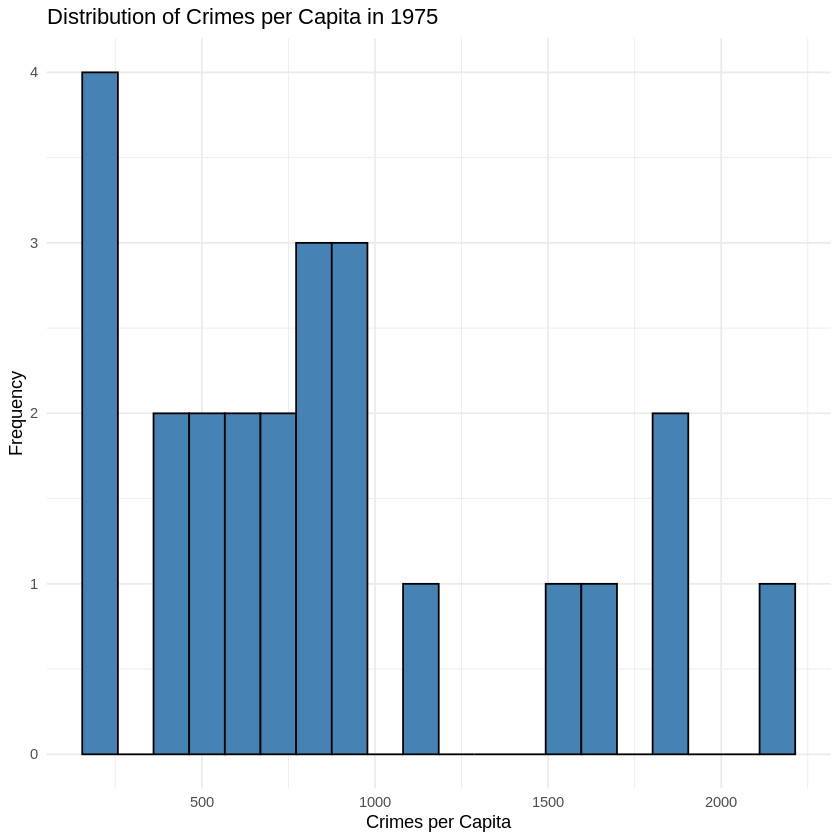

In [14]:
# 3. Histogram: Distribution of crimes per capita
ggplot(data, aes(x = crimes_percapita)) +
  geom_histogram(bins = 20, fill = "steelblue", color = "black") +
  labs(title = "Distribution of Crimes per Capita in 1975",
       x = "Crimes per Capita",
       y = "Frequency") +
  theme_minimal()

Observation:

The distribution of crimes per capita is right-skewed.
Most cities have a crime rate between 400 and 1000 per 100,000 population.
There are a few outliers with very high crime rates (over 1500 per 100,000).

`geom_smooth()` using formula = 'y ~ x'


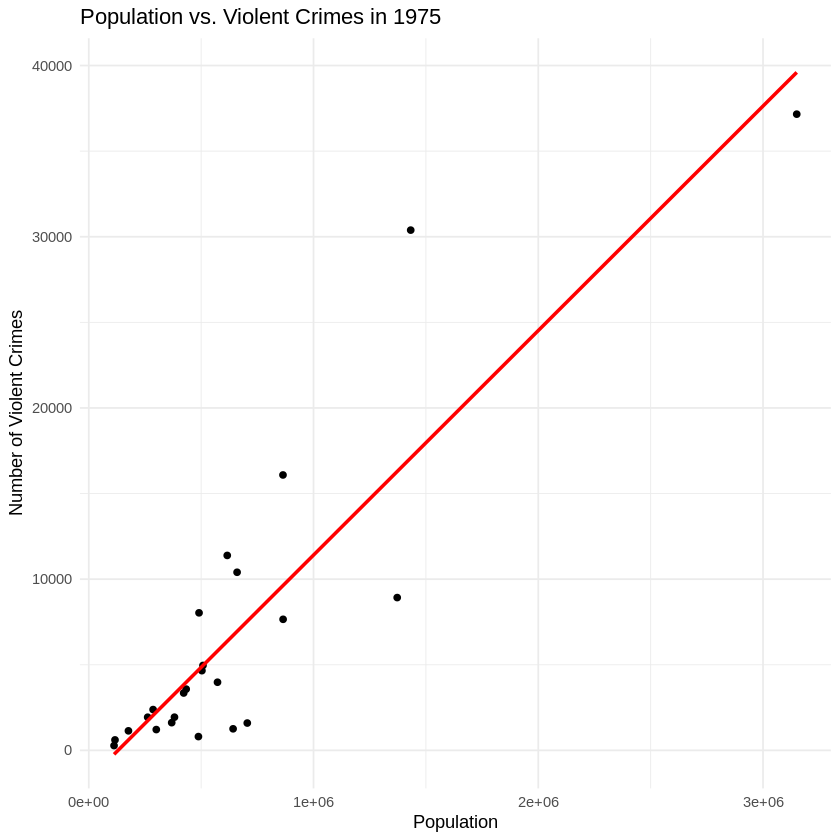

In [15]:
# 4. Scatter plot: Population vs. Violent Crimes
ggplot(data, aes(x = population, y = violent_crimes)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Population vs. Violent Crimes in 1975",
       x = "Population",
       y = "Number of Violent Crimes") +
  theme_minimal()

Observation:

There's a positive correlation between population and the number of violent crimes.
The relationship appears to be roughly linear, with some outliers.
Larger cities tend to have more violent crimes, but there's considerable variation.

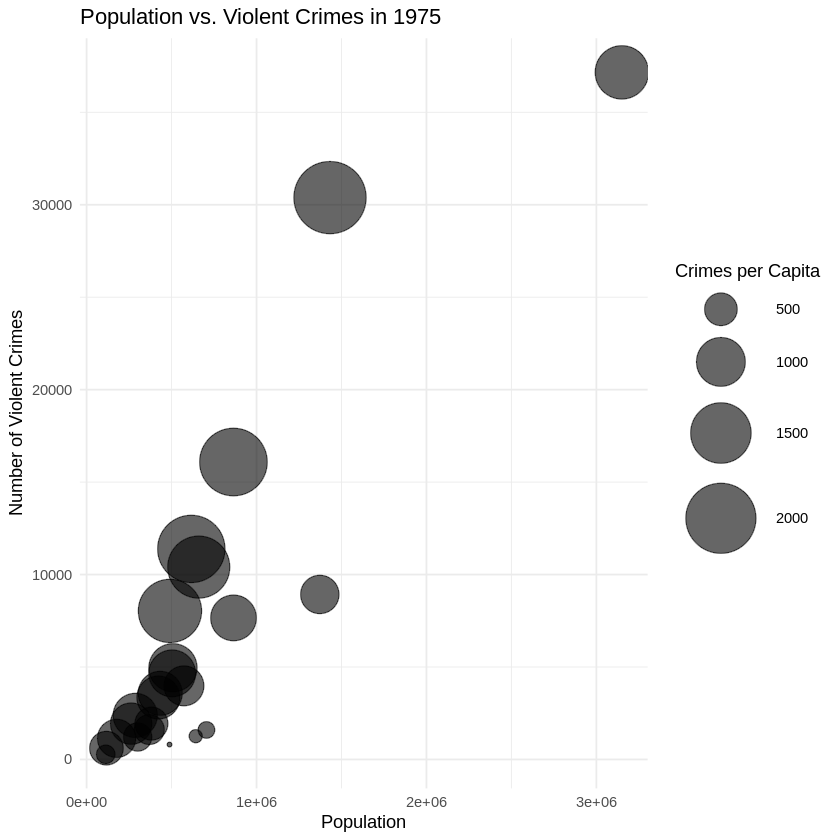

In [16]:
# 5. Bubble plot: Population vs. Violent Crimes, with Total Crimes as bubble size
ggplot(data, aes(x = population, y = violent_crimes, size = crimes_percapita)) +
  geom_point(alpha = 0.6) +
  scale_size(range = c(1, 20)) +
  labs(title = "Population vs. Violent Crimes in 1975",
       x = "Population",
       y = "Number of Violent Crimes",
       size = "Crimes per Capita") +
  theme_minimal()

Observation:

This plot reinforces the positive relationship between population and violent crimes.
The bubble sizes (representing crimes per capita) vary considerably among cities.
Some smaller cities have relatively large bubbles, indicating high crime rates despite smaller populations.
Conversely, some larger cities have smaller bubbles, suggesting lower crime rates relative to their population.